In [8]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
import math

In [9]:
# Set the path to the data folder
data_folder_path = os.path.join(os.getcwd(), 'example_time_series')

# Metadata file name
metadata_file_name = 'example_metadata.csv'
# Full path to the metadata file
metadata_file_path = os.path.join(data_folder_path, metadata_file_name)

# Read the metadata file
metadata_df = pd.read_csv(metadata_file_path)

# A dataframe to store all the combined data frames
combined_dfs = []

# Traverse the folder
for filename in os.listdir(data_folder_path):
    # Check if the file has a '_ch4_fit.tsv' extension
    if filename.endswith('_ch4_fit.tsv'):
        # Construct the full file path
        file_path = os.path.join(data_folder_path, filename)

        # Read the data file
        df = pd.read_csv(file_path, sep='\t', encoding='utf-8')

        # Combine metadata and data
        combined_df = pd.concat([metadata_df, df], axis=1)

        # Column for grouping (e.g., treatment groups)
        group_column = 'Treatment'

        # Ensure the grouping column exists
        if group_column in combined_df.columns:
            # Select only numeric columns for aggregation
            numeric_columns = combined_df.select_dtypes(include=['number']).columns.tolist()

            # Aggregate data by 'Treatment' and compute mean and variance for numeric columns
            group_stats = combined_df.groupby('Treatment')[numeric_columns].agg(['mean', 'var'])

            # Reset index and remove multi-level column names
            group_stats.reset_index(inplace=True)
            group_stats.columns = group_stats.columns.map('_'.join).str.strip('_')

            # Add the grouped statistics to the list of data frames
            combined_dfs.append(group_stats)

# Concatenate all combined data frames into a single DataFrame
combined_dfss = pd.concat(combined_dfs, ignore_index=True)



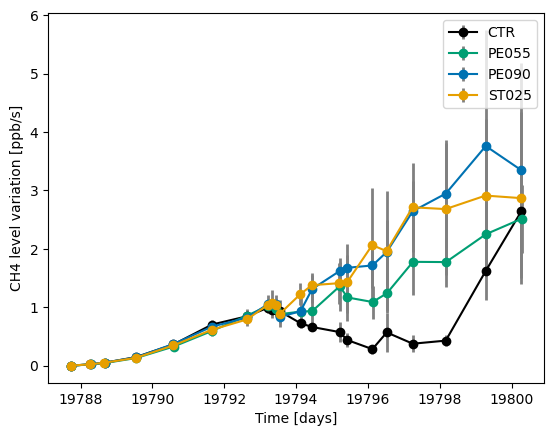

In [21]:
# Plot the time series of CH
# Assuming 'filtered' is a DataFrame with required columns
grouped = combined_dfss.groupby('Treatment')

# Define a list of colors (you can add more if needed)
colors = ['#000000', '#009E73', '#0072B2', '#E69F00']  # Adjust this list based on the number of groups

# Check that there are enough colors for the groups
if len(colors) < len(grouped):
    # If not enough colors, generate additional colors
    import seaborn as sns
    colors = sns.color_palette("husl", len(grouped))

# Create the plot
for i, (name, group) in enumerate(grouped):
    # Plot each group with error bars
    plt.errorbar(
        group['Start_mean'] / 86400,  # Convert time from seconds to days and subtract offset
        group['Slope_mean'],  # Y-values
        yerr=group['Slope_var'].apply(math.sqrt),  # Y-error (standard deviation)
        ecolor='gray',  # Color of the error bars
        elinewidth=2,  # Error bar line width
        capthick=5,  # Thickness of the error bar caps
        linewidth=1.5,  # Line width of the plot
        marker='o',  # Marker style
        color=colors[i],  # Use the ith color for the group
        label=name  # Label each group with its name
    )

# Add labels and legend
plt.xlabel('Time [days]')
plt.ylabel('CH4 level variation [ppb/s]')
plt.legend()

# Save the plot to a file
plt.savefig('EXAMPLE_TIME_SERIES_FLUX_CH4.png')

# Show the plot (optional)
plt.show()


In [22]:
# Assemble the time series of CH4
# Initialize an empty DataFrame to store all data files
combined_df = pd.DataFrame()

# Iterate through the folder
for filename in os.listdir(data_folder_path):
    # Check if the file ends with .csv
    if filename.endswith('_ch4_fit.tsv'):
        # Construct the full file path
        file_path = os.path.join(data_folder_path, filename)

        df = pd.read_csv(file_path, sep='\t', encoding='utf-8')

        group_column = 'Treatment'

        # Ensure the grouping column exists
        if group_column in df.columns:
            # Only select numeric columns for aggregation
            numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
            group_stats = df.groupby('Treatment')[numeric_columns].agg(['mean', 'var'])

            # Reset the index and remove the intermediate level column names
            group_stats.reset_index(inplace=True)
            group_stats.columns = group_stats.columns.map('_'.join).str.strip('_')
        
            # Merge the metadata with the data
        combined_df = pd.concat([combined_df, group_stats], ignore_index=True)
        
combined_df.to_csv(data_folder_path+'\\EXAMPLE_TIME_SERIES_FLUX_CH4_MEAN.csv', index=False, header=True, sep=';', encoding='utf-8')

In [23]:
# A data frame to store all the combined data frames
combined_dfs2 = []

# Traverse the folder
for filename in os.listdir(data_folder_path):
    # Check if the file has a '_co2_fit.tsv' extension
    if filename.endswith('_co2_fit.tsv'):
        # Construct the full file path
        file_path = os.path.join(data_folder_path, filename)

        # Read the data file
        df = pd.read_csv(file_path, sep='\t', encoding='utf-8')

        # Combine metadata and data
        combined_df2 = pd.concat([metadata_df, df], axis=1)

        # Column for grouping (e.g., treatment groups)
        group_column = 'Treatment'

        # Ensure the grouping column exists
        if group_column in combined_df2.columns:
            # Select only numeric columns for aggregation
            numeric_columns = combined_df2.select_dtypes(include=['number']).columns.tolist()

            # Aggregate data by 'Treatment' and compute mean and variance for numeric columns
            group_stats = combined_df2.groupby('Treatment')[numeric_columns].agg(['mean', 'var'])

            # Reset index and remove multi-level column names
            group_stats.reset_index(inplace=True)
            group_stats.columns = group_stats.columns.map('_'.join).str.strip('_')

            # Add the grouped statistics to the list of data frames
            combined_dfs2.append(group_stats)

# Concatenate all combined data frames into a single DataFrame
combined_dfss2 = pd.concat(combined_dfs2, ignore_index=True)

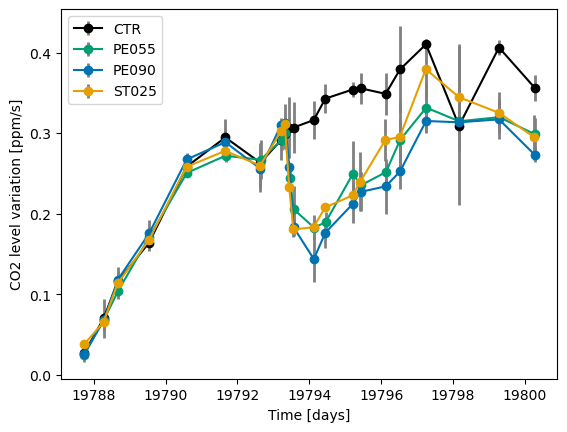

In [17]:
# Plot the time series of CO2
# Assuming 'filtered' is a DataFrame with required columns
grouped2 = combined_dfss2.groupby('Treatment')

# Define a list of colors (you can add more if needed)
colors = ['#000000', '#009E73', '#0072B2', '#E69F00']  # Adjust this list based on the number of groups

# Check that there are enough colors for the groups
if len(colors) < len(grouped):
    # If not enough colors, generate additional colors
    import seaborn as sns
    colors = sns.color_palette("husl", len(grouped))

# Create the plot
for i, (name, group) in enumerate(grouped2):
    # Plot each group with error bars
    plt.errorbar(
        group['Start_mean'] / 86400,  # Convert time from seconds to days and subtract offset
        group['Slope_mean'],  # Y-values
        yerr=group['Slope_var'].apply(math.sqrt),  # Y-error (standard deviation)
        ecolor='gray',  # Color of the error bars
        elinewidth=2,  # Error bar line width
        capthick=5,  # Thickness of the error bar caps
        linewidth=1.5,  # Line width of the plot
        marker='o',  # Marker style
        color=colors[i],  # Use the ith color for the group
        label=name  # Label each group with its name
    )

# Add labels and legend
plt.xlabel('Time [days]')
plt.ylabel('CO2 level variation [ppm/s]')
plt.legend()

# Save the plot to a file
plt.savefig(data_folder_path+'\\EXAMPLE_TIME_SERIES_FLUX_CO2.png')

# Show the plot (optional)
plt.show()

In [24]:
# Assemble the time series of CO2
# Initialize an empty DataFrame to store all data files
combined_df = pd.DataFrame()

# Iterate through the folder
for filename in os.listdir(data_folder_path):
    # Check if the file ends with .csv
    if filename.endswith('_co2_fit.tsv'):
        # Construct the full file path
        file_path = os.path.join(data_folder_path, filename)

        df = pd.read_csv(file_path, sep='\t', encoding='utf-8')

        group_column = 'Treatment'

        # Ensure the grouping column exists
        if group_column in df.columns:
            # Only select numeric columns for aggregation
            numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
            group_stats = df.groupby('Treatment')[numeric_columns].agg(['mean', 'var'])

            # Reset the index and remove the intermediate level column names
            group_stats.reset_index(inplace=True)
            group_stats.columns = group_stats.columns.map('_'.join).str.strip('_')
        
            # Merge the metadata with the data
        combined_df = pd.concat([combined_df, group_stats], ignore_index=True)
        
combined_df.to_csv(data_folder_path+'\\EXAMPLE_TIME_SERIES_FLUX_CO2_MEAN.csv', index=False, header=True, sep=';', encoding='utf-8')
